In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
print("Setup Complete")

Setup Complete


In [2]:
spotify = pd.read_csv('./data/spotify_data/Spotify_Dataset_V3.csv', sep=';', parse_dates=['Date'], dayfirst=True)
spotify.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [3]:
df1 = spotify[['Title', 'id']].drop_duplicates()
df2 =spotify[['Title', 'id']].drop_duplicates(subset=['id'])
Title1 = df1['Title'].values
Title2 = df2['Title'].values
dirty_data = np.setdiff1d(Title1, Title2, assume_unique=False)
print(len(dirty_data))

39


In [4]:
for title in dirty_data:
    index = spotify[spotify['Title']==title].iloc[0]['id']
    spotify.loc[spotify['id']==index, 'Title'] = title

In [8]:
data_dict = {}
for col in ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Points (Total)']:
    daily_list = []
    for date in spotify['Date'].sort_values().unique():
        spotify_date = spotify[spotify["Date"]==date]
        daily_feature = (spotify_date[col]*spotify_date['Points (Ind for each Artist/Nat)'] / 200).sum()
        daily_list.append(daily_feature)
    data_dict[col] = daily_list

In [9]:
df_features_daily = pd.DataFrame(data=data_dict, index=spotify['Date'].sort_values().unique())
df_features_daily.head()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total)
2017-01-01,69.377595,68.324210,12.657880,18.185580,0.849185,52.479965,13575.365
2017-01-02,68.676675,67.603040,12.490530,18.928425,0.828535,50.730020,13558.550
2017-01-03,68.670750,67.410175,12.573005,18.957670,0.859855,50.528910,13552.700
2017-01-04,68.591655,67.417870,12.581075,18.929845,0.886650,50.433440,13551.975
2017-01-05,68.640970,67.429635,12.573120,19.031535,0.897255,50.396855,13551.095


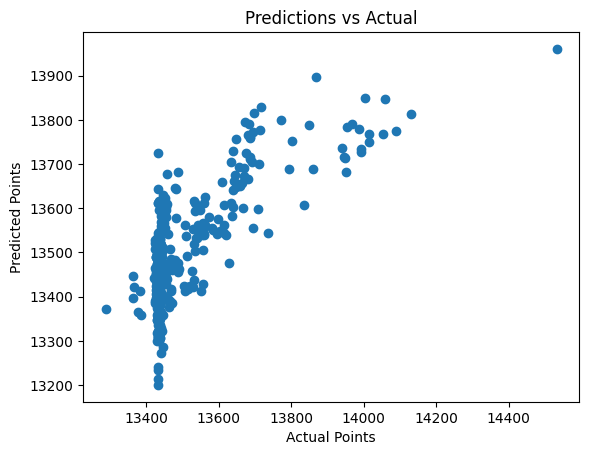

In [10]:
#use all features to predict points
X = df_features_daily[['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]
y = df_features_daily['Points (Total)']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#fit model
model = LinearRegression()
model.fit(X_train, y_train)

#predict on test data
y_pred = model.predict(X_test)

#plot predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Predictions vs Actual')
plt.show()


In [ ]:
#参与考虑时间的影响进行预测